In [2]:
import pandas as pn
data=pn.read_csv("logistic.csv", header=None)

import numpy as np
data=np.asarray(data)

import math

In [3]:
X= data[:,:data.shape[1]-1]
y= data[:,-1:] 


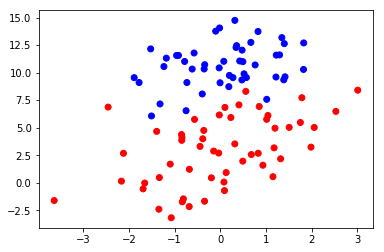

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline


color=['red' if c == 1 else 'blue' for c in y]

plt.scatter(X[:,0],X[:,1],c=color)

#plt.plot(np.array)

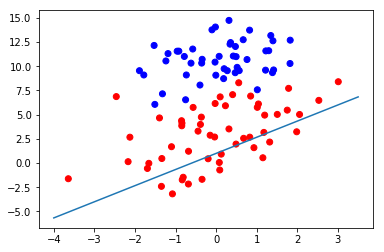

In [5]:
'''
Now trying to manually draw a line between the two types of data that would act as an boundery line
If after putting a random point's value on the line's equation, if the value is greater than 0, we'll say the line is on it's
right, otherwise left

'''

x1 = np.linspace(-4.0, 3.5, num = 5)
w0 = 3
w1 = 5
w2 = -3

x2 = (-1*((w1*x1) + w0))/w2

plt.scatter(X[:,0],X[:,1],c=color)
plt.plot(x1,x2)

### Logistic Regression

Draw the best line that separates the two classes

Steps:
    1. find w0, w1, w2 for the line (w0 + w1 x1 + w2 x2)
    2. Using the given X in file, find the linear equation
    3. Now set the unknown values on the equations to calculate predicted value of y.
    4. If (predicted_value > 0)
           lebel = +1
       ELse If (predicted_value < 0)
           lebel = -1
           
But the If else portion causes disconnected fuction, which is not differentiable.
We'll use sigmoid fuction in the 4th step instead.

                        1
    4. label = ----------------------
                1 + e ^ - predicted_value

    5. predicted_y = Differetiate (label) = label * (1 - (e ^ - predicted_value))
    
    6. Now cost function, C = -y log (predicted_y) - (1 - y) log (1 - predicted_y), to make gradient decsent easier
        
        del(C)            1                                              1
    7. --------- =[ -y * ---- * p_y * (1 - p_y) * 1 ] - [ (1 - y) * ----------  * (-1) * p_y (1 - p_y) 
        del(w0)          p_y                                         (1 - p_y)
           
           
                = (p_y - y) * 1
                
     
        del(C)       
    8. --------- = (p_y - y) * x1
        del(w1)
        
        del(C)       
    9. --------- = (p_y - y) * x2
        del(w2)
        
        
    10. With the slopes, now we can calculate the linear equation with gradient descent

In [6]:
def sigmoid(z):
    1/1+math.exp(-z)

In [12]:
def gradient_descent(X, y,base, w, maxIter):
    alpha = 0.0001
    gradient = []
    N  = len(y)
    
    
    #for plotting
    J = []
    Iter = []
    
    
    
    for i in range(maxIter):
        
        #base = w0, w = rest of the w's. Calculating predicted y
        y_current = base
        for j in range (0,len(w)):
            y_current = y_current + (X[ : ,[j]] * w[j]);
            
        
        #label calculation
        length = len(w) + 1
        for j in range (0, length):
            y_current[j] = sigmoid(y_current[j])
        
        #cost function
        cost = (y_current - y)
        
        #for plotting J with iteration
        summ = 0
        for j in range (0, length):
            summ = summ + sum(cost[j])
            
        J.insert(i, summ/N)
        Iter.insert(i, i)
        
        #calculating gradients
        gradient_base = (1) * sum(cost[0])
        
        for j in range (0,len(w)):
            gradient.insert(j,  ((1) * sum(X[ : ,[j]] * cost[j])))
            
        
        #claculating w's
        base = base - (alpha * gradient_base)
        for j in range (0,len(w)):
            w[j] = w[j] - (alpha * gradient[j])
            
        
    some = [base, w, J,  Iter]
    
    return some

-0.0006776910278010465
[-0.2021559]
[-1.25605363]


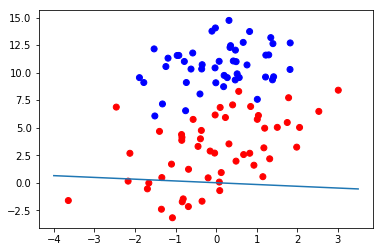

In [11]:
w = []

for j in range (0,X.shape[1]):
    w.insert(j, 0.1)
    
base = 0.1

res = gradient_descent(X, y, base, w, 1000)

x1 = np.linspace(-4.0, 3.5, num = 5)

w = res[1]
w0 = res[0]
w1 = w[0]
w2 = w[1]

x2 = (-1*((w1*x1) + w0))/w2

plt.scatter(X[:,0],X[:,1],c=color)
plt.plot(x1,x2)

print(w0)
print(w1)
print(w2)